<a href="https://colab.research.google.com/github/rsonar821/Unsupervised-Learning-Capstone-Project/blob/main/Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [21]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Books Dataframe**

In [22]:
books_df = pd.read_csv('/content/drive/MyDrive/Books.csv')

In [23]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [24]:
books_df.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [25]:
books_df.shape

(271360, 8)

In [26]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [27]:
books_df.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [28]:
books_df.duplicated().sum()

0

In [29]:
books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

In [30]:
books_df.rename(columns = {'Book-Title':'Title', 'Book-Author':'Author',
                           'Year-Of-Publication':'Publication Year'}, inplace=True)

In [31]:
books_df.nunique()

ISBN                271360
Title               242135
Author              102023
Publication Year       202
Publisher            16807
dtype: int64

In [32]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ISBN              271360 non-null  object
 1   Title             271360 non-null  object
 2   Author            271359 non-null  object
 3   Publication Year  271360 non-null  object
 4   Publisher         271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [33]:
books_df.describe(include = 'all')

,ISBN,Title,Author,Publication Year,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [34]:
books_df.isnull().sum()

ISBN                0
Title               0
Author              1
Publication Year    0
Publisher           2
dtype: int64

In [35]:
books_df['Author'].fillna('Agatha Christie', inplace=True)
books_df['Publisher'].fillna('Harlequin', inplace=True)

In [36]:
books_df.isnull().sum()

ISBN                0
Title               0
Author              0
Publication Year    0
Publisher           0
dtype: int64

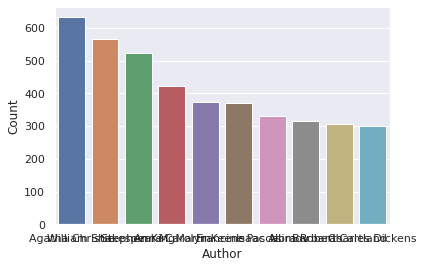

In [37]:
top_authors = pd.DataFrame(books_df['Author'].value_counts()[:10]).reset_index()
top_authors.rename(columns = {'index':'Author', 'Author':'Count'}, inplace = True)
sns.barplot(x = 'Author', y = 'Count', data = top_authors)

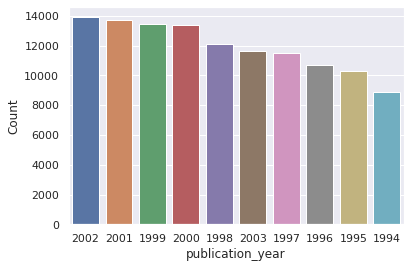

In [38]:
top_years = pd.DataFrame(books_df['Publication Year'].value_counts()[:10]).reset_index()
top_years.rename(columns = {'index':'publication_year', 'Publication Year':'Count'}, inplace=True)
sns.barplot(x='publication_year', y='Count', data=top_years, order=top_years.sort_values('Count', ascending=False).publication_year)

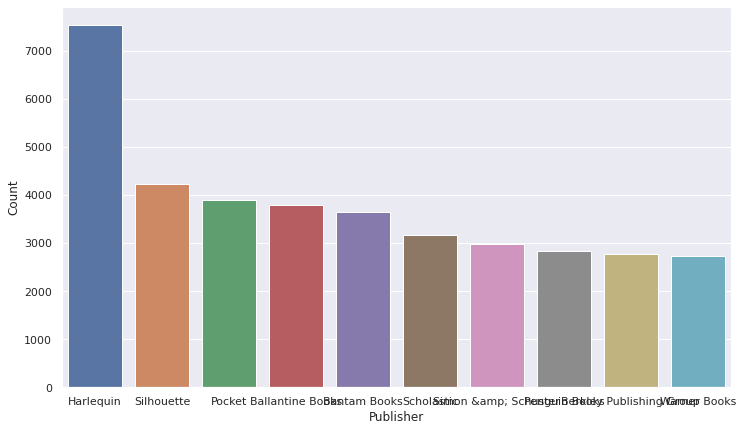

In [39]:
top_publishers = pd.DataFrame(books_df['Publisher'].value_counts()[:10]).reset_index()
top_publishers.rename(columns = {'index':'Publisher', 'Publisher':'Count'}, inplace=True)
plt.figure(figsize=(12,7))
sns.barplot(x='Publisher', y='Count', data=top_publishers)

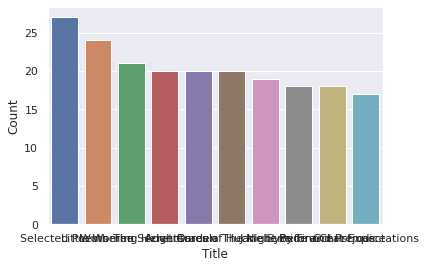

In [40]:
top_titles = pd.DataFrame(books_df['Title'].value_counts()[:10]).reset_index()
top_titles.rename(columns = {'index':'Title', 'Title':'Count'}, inplace = True)
sns.barplot(x = 'Title', y = 'Count', data = top_titles)